# 图片预处理

In [2]:
import os, shutil, platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import shuffle 
%matplotlib inline 

In [3]:
print("当前工作目录是:")
print(os.getcwd())

当前工作目录是:
/home/ubuntu/cat_vs_dog_cnn


In [4]:
from PIL import Image
print(Image.__file__)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/PIL/Image.py


## 清理训练集

In [ ]:
bad_image_names = [
    'cat.12272.jpg', 'dog.1773.jpg', 'cat.10029.jpg', 'cat.3216.jpg', 
    'cat.5071.jpg', 'dog.6725.jpg', 'cat.7464.jpg', 'dog.1259.jpg', 
    'dog.8736.jpg', 'dog.1625.jpg', 'dog.11437.jpg', 'dog.10190.jpg', 
    'cat.10636.jpg', 'cat.5351.jpg', 'cat.8921.jpg', 'dog.1895.jpg', 
    'dog.11266.jpg', 'cat.2520.jpg', 'cat.8456.jpg', 'cat.5974.jpg', 
    'cat.3004.jpg', 'dog.12376.jpg', 'cat.4688.jpg', 'dog.4218.jpg', 
    'cat.10365.jpg', 'cat.9171.jpg', 'dog.10747.jpg', 'cat.2939.jpg', 
    'dog.5604.jpg', 'cat.11184.jpg', 'dog.7076.jpg', 'dog.6475.jpg', 
    'cat.12476.jpg', 'dog.9188.jpg', 'dog.11299.jpg', 'dog.2614.jpg', 
    'dog.10161.jpg', 'cat.4308.jpg', 'dog.4367.jpg', 'dog.8898.jpg', 
    'cat.5418.jpg', 'cat.3672.jpg', 'cat.11039.jpg', 'cat.7968.jpg', 
    'cat.12424.jpg', 'dog.10801.jpg', 'cat.7564.jpg', 'dog.1194.jpg', 
    'dog.2339.jpg', 'cat.8470.jpg', 'cat.4338.jpg', 'cat.6345.jpg', 
    'cat.9983.jpg', 'cat.1139.jpg', 'dog.7706.jpg', 'cat.10536.jpg', 
    'dog.10237.jpg', 'cat.7377.jpg', 'dog.9517.jpg', 'cat.6348.jpg', 
    'dog.3889.jpg', 'cat.10712.jpg', 'dog.4507.jpg', 'dog.2422.jpg']

# 明显错误，不包含猫或者狗的图片
wrong_type1_list = 
    [0,1,2,3,8,13,18,21,25,26,28,29,31,34,35,36,38,39,40,45,46,47,50,53,56,57,58,61]
# 包含卡通猫狗或者两者都有的图片下标
wrong_type3_list = 
    [7,11,15,22,27,33,43,49]
# 背景复杂但是包含正常猫狗单一图片的图片下标
wrong_type4_list = 
    [5,10,12,14,17,19,24,30,37,41,42,44,48,51,52,55,59,60,62,63]

## 定义的目录结构变量

In [5]:
# 训练集图片目录
train_set_folder = 'train1'
train_set_folder_cat = 'train1/cats/'
train_set_folder_dog = 'train1/dogs/'

# 验证集图片目录
validation_set_folder = 'valid'
validation_set_folder_cat = 'valid/cats/'
validation_set_folder_dog = 'valid/dogs/'

## 新建有关目录结构

In [6]:
def rmrf_mkdir(dirname):
    if os.path.exists(dirname):
        shutil.rmtree(dirname)
    os.mkdir(dirname)

rmrf_mkdir(train_set_folder)
os.mkdir(train_set_folder_cat)
os.mkdir(train_set_folder_dog)

rmrf_mkdir(validation_set_folder)
os.mkdir(validation_set_folder_cat)
os.mkdir(validation_set_folder_dog)

## 加载训练集目录

In [9]:
train_filenames = os.listdir(train_images_folder)
train_cat = filter(lambda x:x[:3] == 'cat', train_filenames)
train_dog = filter(lambda x:x[:3] == 'dog', train_filenames)

In [10]:
print (type(train_cat))
print (len(train_filenames))

<class 'filter'>
25000


In [11]:
print (train_filenames[24999])

cat.2814.jpg


定义一组移动有用的函数：

In [12]:
num_of_images_valid_set = 2500
        
def move_cat_images():
    timer = 0
    for filename in train_cat:
        if timer < num_of_images_valid_set:
            shutil.copy2('train/'+filename, validation_set_folder_cat)
        else:
            shutil.copy2('train/'+filename, train_set_folder_cat)
        timer = timer + 1

def move_dog_images():
    timer = 0
    for filename in train_dog:
        if timer < num_of_images_valid_set:
            shutil.copy2('train/'+filename, validation_set_folder_dog)
        else:
            shutil.copy2('train/'+filename, train_set_folder_dog)
        timer = timer + 1  

In [13]:
def fill_train_set_valid_set_folder_with_images():
    move_cat_images()
    move_dog_images()

In [14]:
fill_train_set_valid_set_folder_with_images()
print ('fill_train_set_valid_set_folder_with_images执行完毕')

fill_train_set_valid_set_folder_with_images执行完毕


Using TensorFlow backend.


40960/35363 [==================================] - 0s 0us/step


[('n02090379', 'redbone', 0.93936557),
 ('n02087394', 'Rhodesian_ridgeback', 0.017176341),
 ('n02100583', 'vizsla', 0.017114045),
 ('n02089867', 'Walker_hound', 0.006026428),
 ('n02088238', 'basset', 0.004576395),
 ('n02107312', 'miniature_pinscher', 0.0015335437),
 ('n02100877', 'Irish_setter', 0.001389114),
 ('n02089973', 'English_foxhound', 0.001247769),
 ('n02088466', 'bloodhound', 0.0012463509),
 ('n02088364', 'beagle', 0.0011498699)]

In [ ]:
from keras.applications.xception import Xception
from keras.applications.inception_resnet_v2 import InceptionResNetV2

# 搭建并且编译模型

In [12]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [13]:
batch_size = 64
target_size = (299, 299)

# 不包含原有模型的全连接层
base_model = InceptionResNetV2(include_top=False, 
                             weights='imagenet',
                             input_shape = (299, 299, 3),
                             pooling='avg')

x = base_model.output

# x = Dense(units = 1024, activation = 'relu',  name='fc1')(x)

x = Dropout(0.8, name='dropout')(x)

# Classifier
predictions = Dense(units = 1, activation='sigmoid',  name='predictions')(x)

model = Model(inputs=base_model.input, outputs=predictions)

print("模型组装完毕！")

模型组装完毕！


## 可视化模型结构

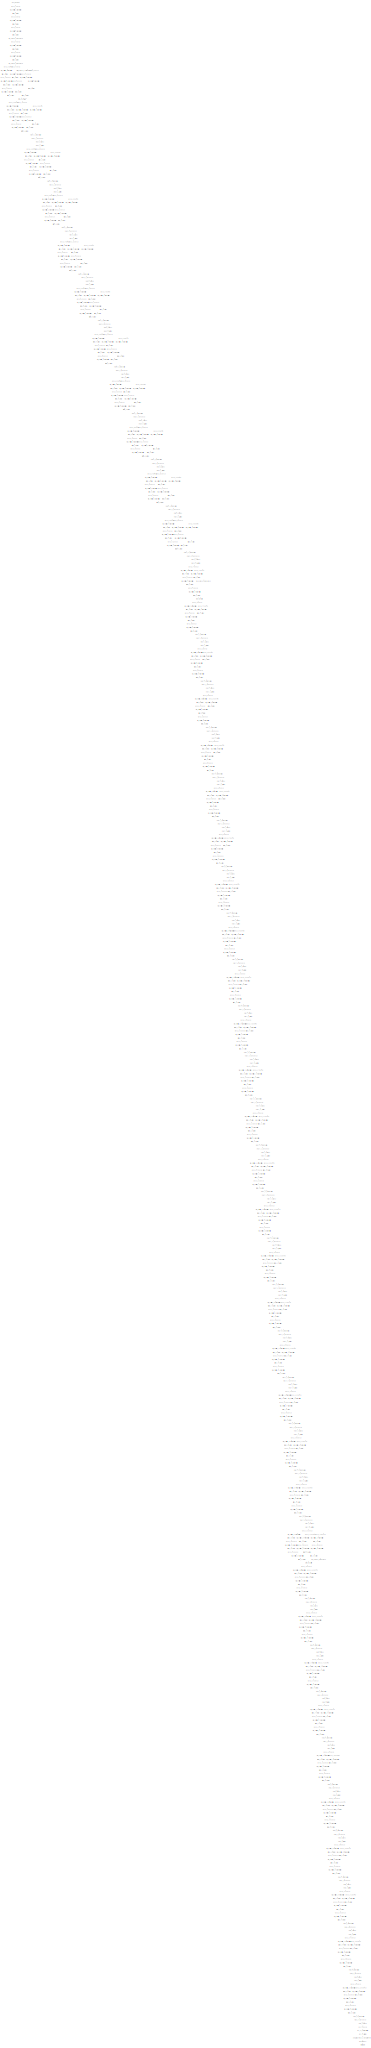

In [14]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## 打印各层名称

In [15]:
for i in range(len(model.layers)):
    print(i,model.layers[i].name)

0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed_5b
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 conv2d_13
51 conv2d_15
52 conv2d_18
53 batch_normalization_13
54 batch_normalization_15
55 batch_normalization

## 编译模型

In [16]:
for layer in model.layers[:618]:
    layer.trainable = False
    
for layer in model.layers[618:]:
    layer.trainable = True

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print("模型编译完成!")

模型编译完成!


## 备份模型到`json`文件

In [17]:
from keras.models import model_from_json

# 保存模型结构
model_json = model.to_json()
with open("best_model.json", "w") as json_file:
    json_file.write(model_json)
    
print("模型已经保存到json文件！")

模型已经保存到json文件！


## 训练模型

In [18]:
train_image_gen = ImageDataGenerator(rotation_range=30,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     rescale = 1./255,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     vertical_flip=False,
                                     horizontal_flip = True)
print("训练集图片:")
training_set = train_image_gen.flow_from_directory('train1',
                                                 target_size = target_size,
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')

valid_image_gen = ImageDataGenerator(rescale = 1./255)

print("验证集图片:")
validation_set = valid_image_gen.flow_from_directory('valid',
                                                 target_size = target_size,
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


训练集图片:
Found 20000 images belonging to 2 classes.
验证集图片:
Found 5000 images belonging to 2 classes.


## 开始训练模型

In [19]:
# 训练集图片总量
train_size = 20000

# 每一轮训练需要执行的步长
steps_per_epoch = train_size/batch_size 

# 验证集图片总量
valid_size = 5000
# 每一轮验证需要执行的步长
validation_steps = valid_size/batch_size

print("steps_per_epoch:")
print(steps_per_epoch)
print("validation_steps:")
print(validation_steps)

steps_per_epoch:
312.5
validation_steps:
78.125


In [20]:
# 增加检查点，设置模型早停
callbacks = [EarlyStopping(monitor='val_loss', patience=4),
             ModelCheckpoint(filepath='final_model_weights.h5', monitor='val_loss', save_best_only=True)]

# 使用模型拟合图片数据
histpry_rec = model.fit_generator(training_set, epochs = 6, steps_per_epoch = 500, callbacks=callbacks,
                    validation_data=validation_set, validation_steps = 100)

Epoch 1/6
500/500 [==============================] - 758s 2s/step - loss: 0.0576 - acc: 0.9777 - val_loss: 0.0203 - val_acc: 0.9926
Epoch 2/6
500/500 [==============================] - 738s 1s/step - loss: 0.0367 - acc: 0.9863 - val_loss: 0.0210 - val_acc: 0.9930
Epoch 3/6
500/500 [==============================] - 738s 1s/step - loss: 0.0314 - acc: 0.9877 - val_loss: 0.1020 - val_acc: 0.9654
Epoch 4/6
500/500 [==============================] - 739s 1s/step - loss: 0.0245 - acc: 0.9905 - val_loss: 0.0186 - val_acc: 0.9928
Epoch 5/6
500/500 [==============================] - 738s 1s/step - loss: 0.0229 - acc: 0.9918 - val_loss: 0.0251 - val_acc: 0.9894
Epoch 6/6
500/500 [==============================] - 747s 1s/step - loss: 0.0191 - acc: 0.9934 - val_loss: 0.0528 - val_acc: 0.9844


## 展示训练过程

In [22]:
# Get training and test loss histories
training_loss = histpry_rec.history['loss']
val_loss = histpry_rec.history['val_loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

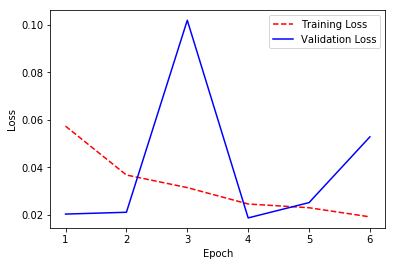

In [24]:
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

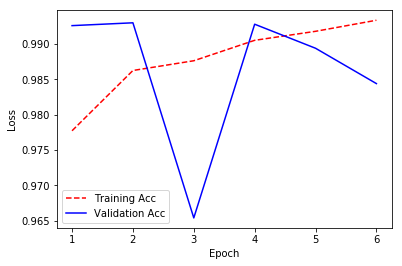

In [26]:
training_acc = histpry_rec.history['acc']
val_acc = histpry_rec.history['val_acc']
# Create count of the number of epochs
epoch_count = range(1, len(training_acc) + 1)
# Visualize loss history
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, val_acc, 'b-')
plt.legend(['Training Acc', 'Validation Acc'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

## 准备预测文件夹

In [27]:
# 测试集图片从zip包解压缩之后的存放目录
test_set_folder = 'test'
test_folder ="test1"
test_inner_folder = "test1/test"
rmrf_mkdir(test_folder)
os.mkdir(test_inner_folder)

In [28]:
def move_test_images():
    test_filenames = os.listdir(test_set_folder)
    for filename in test_filenames:
        shutil.copy2( test_set_folder + '/' + filename, test_inner_folder)


In [29]:
move_test_images()
print("开始导入测试集图片:")
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_folder,
                                                  target_size=target_size, 
                                                  batch_size=batch_size,
                                                  shuffle = False, class_mode=None)

print("测试目录准备完成！")

开始导入测试集图片:
Found 12500 images belonging to 1 classes.
测试目录准备完成！


# 加载模型结构和权重

In [30]:
# 使用新的模型结构加载模型权重
json_file = open("best_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
print("loaded_model重新加载模型权重！")
loaded_model.load_weights('final_model_weights.h5')
print("loaded_model重新加载模型权重完成！")

loaded_model重新加载模型权重！
loaded_model重新加载模型权重完成！


In [31]:
print("预测执行开始！")
pred_result = loaded_model.predict_generator(test_generator, verbose=1)
print("预测执行完毕！")

预测执行开始！
196/196 [==============================] - 58s 296ms/step
预测执行完毕！


In [32]:
test_generator.filenames[:10]

['test/1.jpg',
 'test/10.jpg',
 'test/100.jpg',
 'test/1000.jpg',
 'test/10000.jpg',
 'test/10001.jpg',
 'test/10002.jpg',
 'test/10003.jpg',
 'test/10004.jpg',
 'test/10005.jpg']

In [33]:
pred_result[:10]

array([[9.9999571e-01],
       [7.9337568e-08],
       [4.6198229e-06],
       [9.9999583e-01],
       [9.9999988e-01],
       [5.9221617e-07],
       [8.4181273e-05],
       [1.0000000e+00],
       [9.9946696e-01],
       [5.8935854e-08]], dtype=float32)

## 导出预测结果

In [34]:
import pandas as pd
from keras.preprocessing.image import *

solution = pd.read_csv("sample_submission.csv")

for i, fname in enumerate(test_generator.filenames):
        index = int(fname[fname.rfind('/')+1:fname.rfind('.')])
        solution.set_value(index-1, 'label', pred_result[i])

print("导出结果完成！")

导出结果完成！


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [36]:
solution.to_csv("pred-24.csv", index = False)
solution.head(10)

,id,label
0,1,9.999957e-01
1,2,9.999998e-01
2,3,9.999387e-01
3,4,9.999996e-01
4,5,8.936261e-06
5,6,3.315200e-09
6,7,1.790375e-07
7,8,5.685226e-06
8,9,7.142986e-08
9,10,7.933757e-08
